### transforms

In [1]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
from torch.utils.data import DataLoader

* dataloader의 인자로 들어갈 transform을 미리 정의가능
* Compose를 통해 리스트 안에 순서대로 전처리 진행
* ToTensor()은 torchvision이 PIL image 형태로만 입력을 받기 때문에 데이터 처리를 위해 Tensor형으로 변환 필요

In [2]:
mnist_transform = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize(mean=(0.5,), std=(1.0,))])

In [3]:
trainset = datasets.MNIST(root="C:/Users/jongcheol/OneDrive/바탕 화면/Semester2",
                          train=True,
                          download=False,
                          transform=mnist_transform)

testset = datasets.MNIST(root="C:/Users/jongcheol/OneDrive/바탕 화면/Semester2",
                          train=False,
                          download=False,
                          transform=mnist_transform)

### DataLoader
* DataLoader는 데이터 전체를 보관했다가 실제 모델 학습을 할 때, batch_size 크기만큼 데이터를 가져온다.

In [4]:
train_loader = DataLoader(trainset, batch_size=8,
                          shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=8,
                         shuffle=False, num_workers=2)

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

* shape: (B, C, H, W)
* 즉, 28*28 흑백(Channel=1)이미지가 8장있다는 뜻

In [6]:
torch_image = torch.squeeze(images[0])
torch_image.shape

torch.Size([28, 28])

* images[0]의 shape: (1,28,28)

In [7]:
torch.randint(200, size=(1,)).item()

187

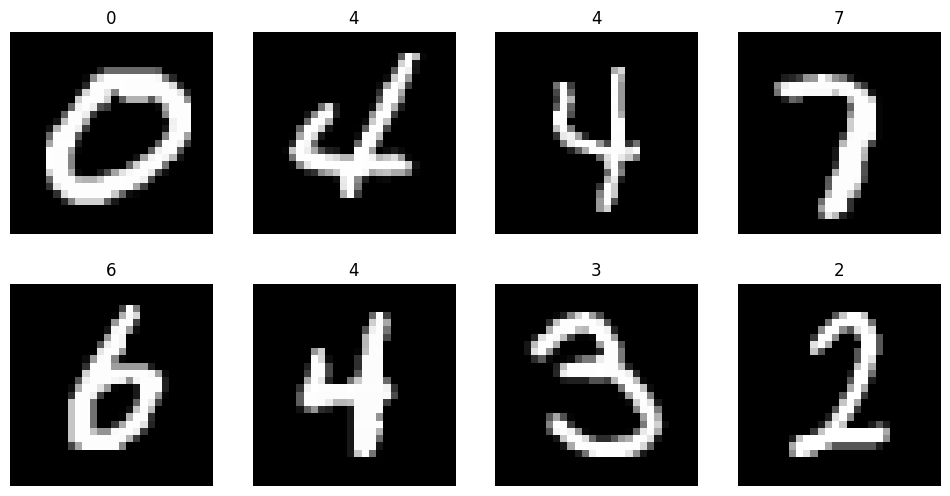

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2

for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

### 신경망 구성
* 레이어(layer)
* 모듈(module): 한 개 이상의 레이어가 모여서 구성
* 모델(model): 한 개 이상의 모듈이 모여서 구성

In [9]:
import torch.nn as nn

### Linear 계층

In [10]:
input = torch.randn(128, 20)
print(input)

m = nn.Linear(20, 30)
    # 입력 피처 수, 출력 피처 수
print(m)

output = m(input)
print(output)
print(output.size())

tensor([[ 0.1273, -1.9756, -0.6067,  ..., -0.8430, -0.1091,  1.4575],
        [-0.6098,  1.2249, -2.0603,  ..., -1.3507,  0.8138,  1.0318],
        [-0.3904, -0.6008, -1.4448,  ...,  1.5681,  0.5125,  0.7661],
        ...,
        [-0.7123, -0.5832,  1.6252,  ..., -0.4221, -1.5194,  1.4951],
        [ 0.0648,  1.5190,  0.0494,  ...,  0.8581, -0.1274, -0.5890],
        [ 0.8265, -0.5233,  0.7435,  ..., -0.1375,  0.5601, -0.9695]])
Linear(in_features=20, out_features=30, bias=True)
tensor([[-0.0355,  1.0671,  0.5358,  ..., -0.0510,  0.5071, -0.0088],
        [-0.1953,  0.6075,  0.1132,  ...,  1.3714,  0.3479, -0.5175],
        [ 0.7786,  0.0092, -0.2434,  ...,  0.6653, -0.2479, -0.2780],
        ...,
        [-0.2447,  0.0752,  0.6541,  ..., -0.2113, -0.0933, -0.5283],
        [ 0.1018,  0.1437,  0.6190,  ..., -0.6524, -0.4994,  0.5168],
        [ 0.3623, -0.5616,  0.0052,  ..., -0.3046, -0.0223,  0.2365]],
       grad_fn=<AddmmBackward0>)
torch.Size([128, 30])


### Conv2d 계층

In [11]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [12]:
m = nn.Conv2d(16, 33, 3, stride=2)
m = nn.Conv2d(16, 33, (3,5), stride=(2,1), padding=(4,2))
m = nn.Conv2d(16, 33, (3,5), stride=(2,1),
               padding=(4,2), dilation=(3,1))
print(m)

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))


In [13]:
output = m(input)
print(output.size())

torch.Size([20, 33, 26, 100])


### 컨볼루션 레이어 자세히 보기

In [14]:
nn.Conv2d(in_channels=1,
          out_channels=20,
          kernel_size=5,
          stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [15]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cpu'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [16]:
weight = layer.weight
print(weight.shape)

torch.Size([20, 1, 5, 5])


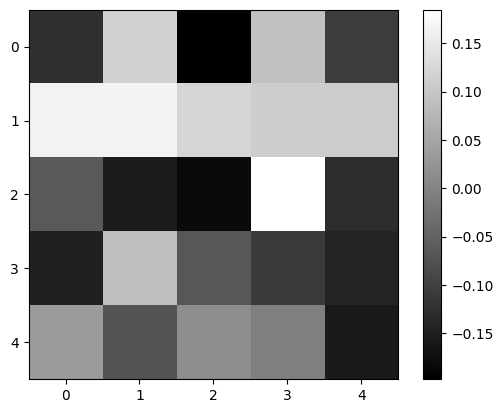

In [17]:
plt.imshow(weight[0, 0, :, :].detach().numpy(),
            'grey')
plt.colorbar()
plt.show()

In [18]:
print(images.shape)
print(images[0].shape)
print(images[0].size())

input_image = torch.squeeze(images[0])
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [19]:
print(images[0].shape)
input_data = torch.unsqueeze(images[0], dim=0)
print(input_data.shape)

output_data = layer(input_data)
output = output_data.data
output_arr = output.numpy()
output_arr.shape

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])


(1, 20, 24, 24)

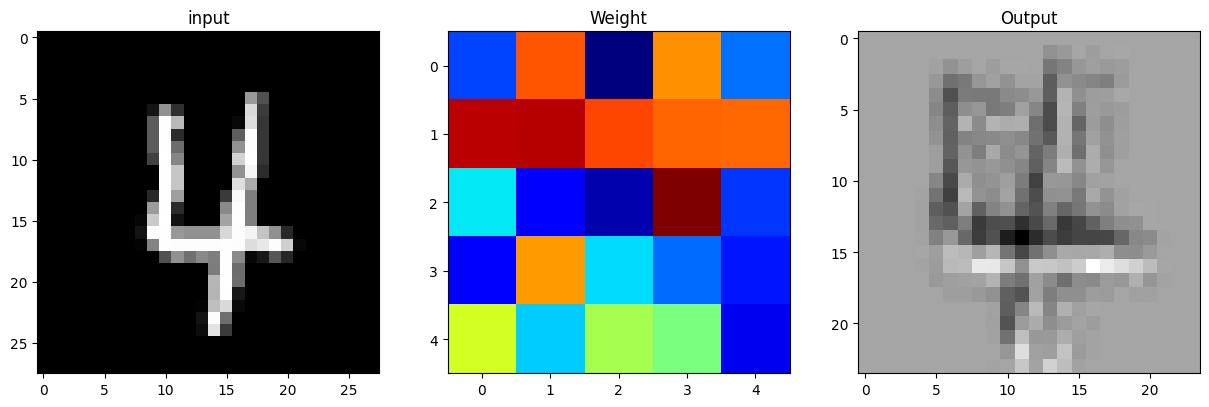

In [20]:
plt.figure(figsize=(15,30))

plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'grey')

plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:].detach().numpy(), 'jet')

plt.subplot(133)
plt.title('Output')
plt.imshow(output_arr[0,0,:,:], 'grey')

### 풀링 레이어

In [21]:
pool = nn.MaxPool2d(2, 2)
pooled = pool(output)
pooled.shape

torch.Size([1, 20, 12, 12])

In [22]:
pool_arr = pooled.numpy()
pool_arr.shape

(1, 20, 12, 12)

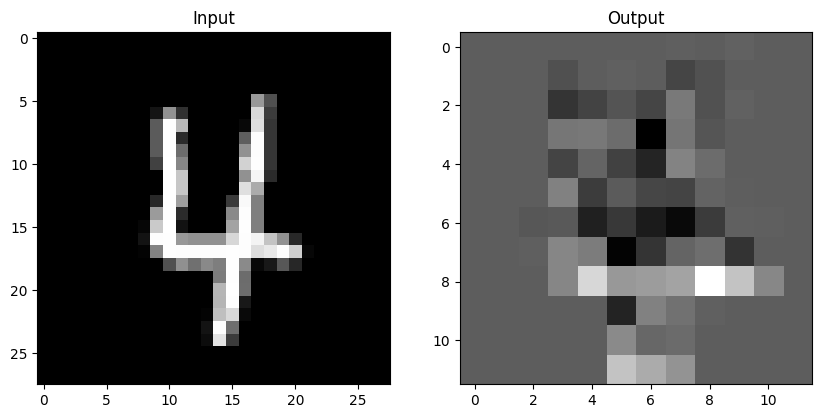

In [23]:
plt.figure(figsize=(10,15))

plt.subplot(121)
plt.title('Input')
plt.imshow(input_image, 'gray')

plt.subplot(122)
plt.title('Output')
plt.imshow(pool_arr[0,0,:,:], 'gray')

### Dense 층

In [24]:
flatten = input_image.view(-1, 28*28)
flatten.shape

torch.Size([1, 784])

In [25]:
lin = nn.Linear(784, 10)(flatten)
lin.shape

torch.Size([1, 10])

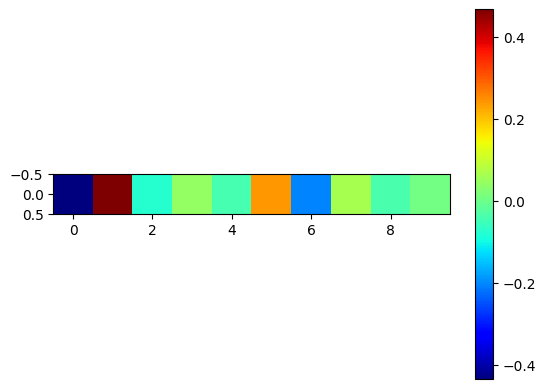

In [26]:
plt.imshow(lin.detach().numpy(), 'jet')
plt.colorbar()
plt.show()

### 비선형 활성화 함수

In [27]:
with torch.no_grad():
    flatten = input_image.view(-1, 28*28)
    lin = nn.Linear(784, 10)(flatten)
    softmax = nn.Softmax(dim=1)
    soft = softmax(lin)

print(soft)
print(soft.sum())

tensor([[0.0606, 0.1582, 0.0974, 0.1296, 0.0460, 0.1008, 0.1106, 0.1100, 0.0893,
         0.0974]])
tensor(1.0000)


In [28]:
inputs = torch.randn(4,3,28,28).to('cuda')
inputs.shape

torch.Size([4, 3, 28, 28])

In [29]:
layer = nn.Conv2d(3,20,5,1).to('cuda')
ReLU = nn.ReLU()
output = ReLU(inputs)
output.shape

torch.Size([4, 3, 28, 28])

### 모델 정의
nn.Module 상속 클래스 정의
* nn.Module을 상속받는 클래스 정의
* __init__(): 모델에서 사용될 모듈과 활성화 함수 등을 정의
* forward(): 모델에서 실행되어야 하는 연산을 정의

In [32]:
class Model(nn.Module): # nn.Module 클래스를 상속받는 클래스 정의 시작
    def __init__(self, inputs): # 모델에서 사용되는 가중치 정의 시작
        super(Model, self).__init__() # super() 함수를 통해 nn.Module 클래스의 속성을 상속받고 초기화
        self.layer = nn.Linear(inputs, 1)
        self.activation = nn.Sigmoid()

    def forward(self, x): # 입력과 정의한 가중치를 이용해 Feed Forward 연산 정의
        x = self.layer(x) # 완전연결층 통과
        x = self.activation(x) # 활성화 함수 적용
        return x

In [35]:
model = Model(1)
print(list(model.children()))
print(list(model.modules()))

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()]
[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()]


nn.Sequential을 이용한 신경망 정의
* nn.Sequential 객체로 그 안에 각 모듈을 순차적으로 실행
* __init__()에서 사용할 네트워크 모델들을 nn.Sequential로 정의 가능
* forward()에서 실행되어야 할 계산을 가독성 높게 작성 가능

In [41]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=32, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )

        self.layer3 = nn.Sequential(
            nn.Linear(in_features=32*4*4, out_features=10, bias=True),
                # in_channels 계산: 28*28 -> 24*24 -> 12*12 -> 8*8 -> 4*4
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(x.shape[0], -1)
        x = self.layer3(x)
        return x

In [42]:
model = Model()
print(list(model.children()))
print(list(model.modules()))

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=512, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 32, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features=512, out_features=10, bias=True)
    (1): ReLU(inplace=True)
  )
), Sequential(
  (

### 손실 함수
예시
* torch.nn.BCELoss
* torch.nn.CrossEntropyLoss
* torch.nn.MSELoss

In [43]:
criterion = nn.MSELoss()

### 옵티마이저
* optimizer는 step()을 통해 전달받은 파라미터로 모델 업데이트
* 모든 옵티마이저는 기본으로 torch.optim.Optimizer(params, defaults) 클래스를 상속받아서 사용함.
* zero_grad()는 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* torch.optim.lr_scheduler를 이용하여 에포크에 따라 학습률 조절 가능

### 지표
* 모델의 학습과 테스트 단계를 모니터링

In [69]:
import torchmetrics

preds = torch.randn(10, 5).softmax(dim=-1)
target = torch.randint(5, (10,))
print(preds, target)

acc = torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)
print(acc)

tensor([[0.1853, 0.0504, 0.3291, 0.2390, 0.1963],
        [0.1250, 0.1020, 0.4356, 0.1689, 0.1685],
        [0.0414, 0.0251, 0.1593, 0.0244, 0.7498],
        [0.4606, 0.0177, 0.2341, 0.1540, 0.1335],
        [0.3529, 0.0869, 0.1637, 0.2595, 0.1370],
        [0.1828, 0.2469, 0.1214, 0.1116, 0.3372],
        [0.1934, 0.4837, 0.1855, 0.0720, 0.0655],
        [0.0872, 0.2992, 0.1213, 0.3769, 0.1153],
        [0.0880, 0.4738, 0.0633, 0.0928, 0.2820],
        [0.0576, 0.1765, 0.4392, 0.0927, 0.2339]]) tensor([3, 2, 2, 0, 3, 4, 1, 2, 1, 3])
tensor(0.5000)


In [ ]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)

n_batches = 10
for i in range(n_batches):
    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10,))

    acc = metric(preds, target)
        # metric을 호출할 때마다 update() 메서드가 자동으로 호출되어 누적됨
    print(acc)

acc = metric.compute()
    # 전체 배치에 대한 accuracy를 출력 (여기선 모든 배치 accuracy의 평균)
print(acc)

tensor(0.1000)
tensor(0.2000)
tensor(0.1000)
tensor(0.)
tensor(0.4000)
tensor(0.3000)
tensor(0.2000)
tensor(0.1000)
tensor(0.2000)
tensor(0.5000)
tensor(0.2100)


### FashionMNIST 분류모델

In [79]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

**데이터 로드**

In [80]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

In [81]:
trainset = datasets.FashionMNIST(root='/FashionMNIST/',
                                 train=True,
                                 download=True,
                                 transform=transform)
testset = datasets.FashionMNIST(root='/FashionMNIST/',
                                 train=False,
                                 download=True,
                                 transform=transform)

100%|██████████| 26.4M/26.4M [00:07<00:00, 3.48MB/s]


Extracting /FashionMNIST/FashionMNIST\raw\train-images-idx3-ubyte.gz to /FashionMNIST/FashionMNIST\raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 114kB/s]


Extracting /FashionMNIST/FashionMNIST\raw\train-labels-idx1-ubyte.gz to /FashionMNIST/FashionMNIST\raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 21.6MB/s]


Extracting /FashionMNIST/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to /FashionMNIST/FashionMNIST\raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 3.34MB/s]

Extracting /FashionMNIST/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to /FashionMNIST/FashionMNIST\raw



In [82]:
train_loader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)
test_loader = DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

In [83]:
images, labels = next(iter(train_loader))
print(images.shape, labels.shape)

torch.Size([128, 1, 28, 28]) torch.Size([128])


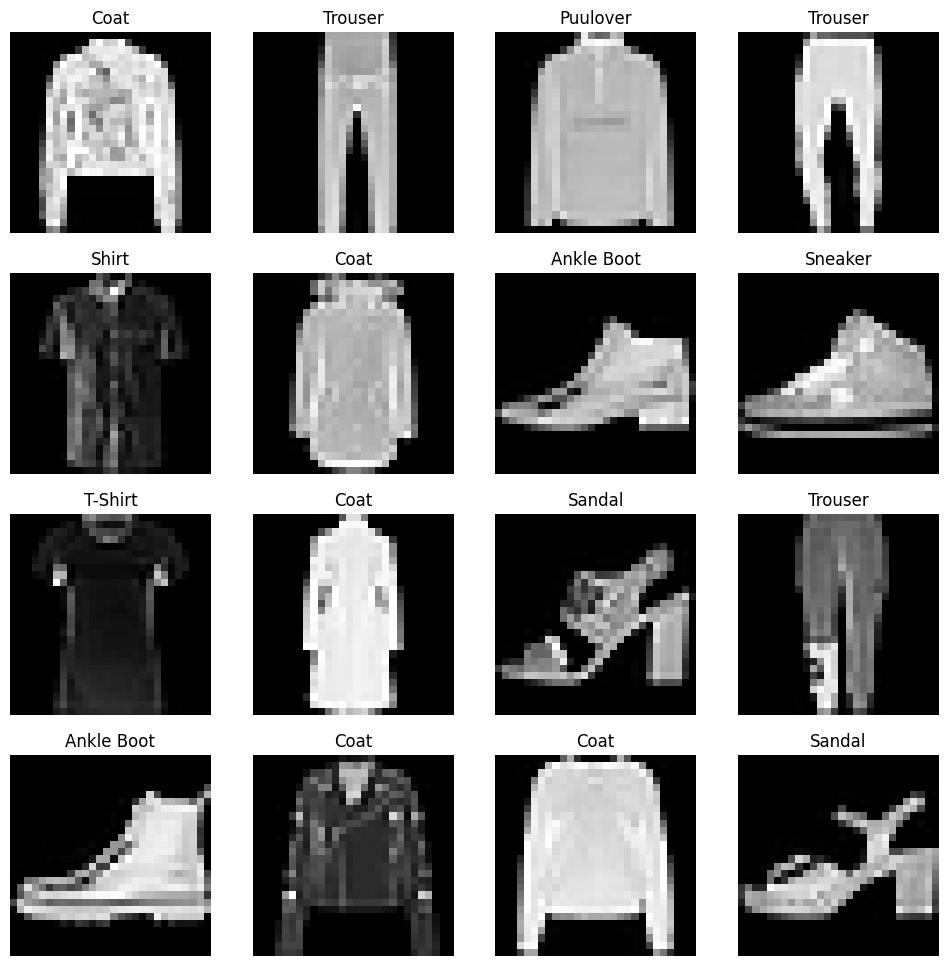

In [84]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Puulover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

figure = plt.figure(figsize=(12,12))
cols, rows = 4,4
for i in range(1, cols*rows+1):
    image = images[i].squeeze()
    label_idx = labels[i].item()
    label = labels_map[label_idx]

    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis('off')
    plt.imshow(image, cmap='gray')

**모델 정의 및 파라미터**

In [122]:
class Neural(nn.Module):
    def __init__(self):
        super(Neural, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=5),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Sequential(
            nn.Linear(64*4*4, 120),
            nn.ReLU(inplace=True)
        )

        self.fc2 = nn.Sequential(
            nn.Linear(120, 10),
            nn.Softmax(dim=-1)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = self.fc2(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s

        return num_features
    
net = Neural()
print(net)

Neural(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Sequential(
    (0): Linear(in_features=1024, out_features=120, bias=True)
    (1): ReLU(inplace=True)
  )
  (fc2): Sequential(
    (0): Linear(in_features=120, out_features=10, bias=True)
    (1): Softmax(dim=-1)
  )
)


In [123]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

8
torch.Size([16, 1, 5, 5])


In [124]:
input = torch.rand(1,1,28,28)
out = net(input)
print(out)

tensor([[0.1081, 0.0948, 0.1067, 0.0973, 0.0927, 0.0982, 0.1081, 0.0924, 0.1093,
         0.0923]], grad_fn=<SoftmaxBackward0>)


**손실함수와 옵티마이저**

In [125]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [126]:
total_batch = len(train_loader)
print(total_batch)

469


In [127]:
for epoch in range(10):
    running_loss = 0.0

    for i, data in enumerate(train_loader):
        inputs, labels = data
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if i % 100 == 99:
            print('Epoch: {}, iter: {}, Loss: {}'.format(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0


Epoch: 1, iter: 100, Loss: 0.1151200157403946
Epoch: 1, iter: 200, Loss: 0.11509624409675598
Epoch: 1, iter: 300, Loss: 0.11507794415950776
Epoch: 1, iter: 400, Loss: 0.11505464124679565
Epoch: 2, iter: 100, Loss: 0.11502071762084962
Epoch: 2, iter: 200, Loss: 0.1149981656074524
Epoch: 2, iter: 300, Loss: 0.11496542906761169
Epoch: 2, iter: 400, Loss: 0.11494090962409974
Epoch: 3, iter: 100, Loss: 0.11488499891757965
Epoch: 3, iter: 200, Loss: 0.11483412146568299
Epoch: 3, iter: 300, Loss: 0.11478544855117798
Epoch: 3, iter: 400, Loss: 0.11472357249259948
Epoch: 4, iter: 100, Loss: 0.11455695414543152
Epoch: 4, iter: 200, Loss: 0.11441137063503265
Epoch: 4, iter: 300, Loss: 0.11419672524929046
Epoch: 4, iter: 400, Loss: 0.1138342856168747
Epoch: 5, iter: 100, Loss: 0.11233364486694336
Epoch: 5, iter: 200, Loss: 0.1100801237821579
Epoch: 5, iter: 300, Loss: 0.10637697768211364
Epoch: 5, iter: 400, Loss: 0.10321317052841186
Epoch: 6, iter: 100, Loss: 0.0991509936451912
Epoch: 6, iter: 20

In [129]:
import torchvision

dataiter = iter(test_loader)
images, labels = next(dataiter)

In [134]:
outputs = net(images)

_, predicted = torch.max(outputs, 1) # 첫번째값(실제 최댓값) 무시하고 뒤의 인덱스(argmax)만 가져옴
print(predicted)

tensor([7, 2, 1, 1, 2, 1, 2, 2, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 7, 7, 5,
        1, 2, 4, 3, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 2, 5, 2, 1,
        4, 4, 2, 2, 5, 2, 4, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 4, 7, 1, 8,
        0, 1, 2, 2, 3, 4, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 2,
        0, 0, 9, 9, 3, 0, 8, 4])


In [136]:
labels

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 2, 3, 9, 8, 7, 0,
        2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 6, 5, 3, 6, 7, 1, 8,
        0, 1, 4, 2, 3, 6, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4])

In [143]:
criterion(outputs, labels)

tensor(1.7137, grad_fn=<NllLossBackward0>)

In [146]:
sum(predicted.detach().numpy() == labels.detach().numpy())/len(labels.detach().numpy())

0.7578125

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(100*correct/total)

tensor([7, 2, 1, 1, 2, 1, 2, 2, 5, 7, 4, 5, 5, 3, 4, 1, 2, 2, 8, 0, 2, 7, 7, 5,
        1, 2, 4, 3, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 3, 9, 2, 5, 2, 1,
        4, 4, 2, 2, 5, 2, 4, 2, 8, 4, 8, 0, 7, 7, 8, 5, 1, 1, 3, 3, 7, 8, 7, 0,
        2, 0, 4, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 3, 4, 7, 1, 8,
        0, 1, 2, 2, 3, 4, 7, 2, 7, 8, 5, 9, 9, 4, 2, 5, 7, 0, 5, 2, 8, 4, 7, 2,
        0, 0, 9, 9, 3, 0, 8, 4])
tensor([1, 5, 4, 1, 9, 1, 8, 2, 2, 1, 2, 5, 1, 2, 0, 0, 1, 2, 1, 3, 2, 2, 2, 2,
        1, 4, 5, 2, 4, 7, 9, 3, 7, 2, 3, 5, 0, 9, 4, 9, 4, 2, 0, 5, 4, 1, 2, 1,
        3, 0, 9, 1, 0, 9, 4, 8, 7, 9, 9, 4, 4, 7, 3, 5, 1, 2, 3, 2, 8, 3, 2, 1,
        1, 0, 2, 9, 2, 4, 0, 7, 9, 5, 4, 1, 8, 4, 1, 3, 3, 5, 7, 4, 8, 5, 1, 0,
        7, 7, 0, 2, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 8, 2, 4,
        2, 4, 9, 7, 3, 5, 5, 4])
tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 2, 3, 2, 9, 0, 1, 2, 0, 4, 3, 0, 8, 3, 7, 4,
        0, 1, 4, 3, 0, 2, 0, 7, 5, 3, 7, 9, 5, 3, 5, 5